##**VISUALIZING THE TECHNICAL INDICATORS WITH THE CANDLESTICK CHART**

### Installing and importing the required libraries

In [ ]:
!pip install mplfinance
!pip install pandas_ta
import pandas as pd
import mplfinance as mpf
import pandas_ta as ta

###Load the "spot trading data" from the provided Excel file

In [5]:
file_path = '/backtestingdata.xlsx'
spot_data = pd.read_excel(file_path)

### Convert the 'date' column to datetime and set it as the index

In [6]:
spot_data['date'] = pd.to_datetime(spot_data['date'])
spot_data.set_index('date', inplace=True)

#### Verify that the index is unique and in the right format

In [7]:
if not spot_data.index.is_unique:
    raise ValueError("Index has duplicate dates, which will cause issues with the plot.")

### Calculate RSI using pandas_ta

In [8]:
spot_data['RSI'] = ta.rsi(spot_data['close'], length=14)

### Calculate Bollinger Bands using pandas_ta with 5 periods


In [18]:
bbands = ta.bbands(spot_data['close'], length=7, std=1.4)
spot_data = pd.concat([spot_data, bbands], axis=1)

### Calculate moving average using pandas_ta with 5 periods

In [19]:
spot_data['SMA'] = ta.sma(spot_data['close'], length=7)

### Define the plot style with white background and black grid

In [20]:
s = mpf.make_mpf_style(base_mpf_style='default', rc={'figure.facecolor': 'white', 'axes.facecolor': 'white', 'grid.color': 'black'})

### Define addplot to add the Bollinger Bands and moving average


In [21]:
apdict = mpf.make_addplot(spot_data[['BBL_7_1.4', 'BBM_7_1.4', 'BBU_7_1.4', 'SMA']], width=0.8)

### Define the RSI panel




In [22]:
rsi_panel = mpf.make_addplot(spot_data['RSI'], panel='lower', color='purple', ylabel='RSI')

### Define market colors

In [23]:
mc = mpf.make_marketcolors(up='green', down='red', inherit=True)
s = mpf.make_mpf_style(base_mpf_style='default', marketcolors=mc, rc={'figure.facecolor': 'white', 'axes.facecolor': 'white', 'grid.color': 'black'})

### Plot the data with mplfinance

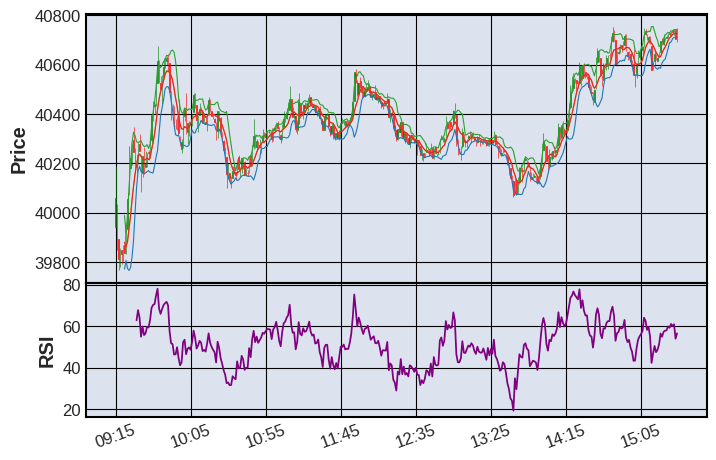

In [24]:
mpf.plot(spot_data, type='candle', addplot=[apdict, rsi_panel], style=s, volume=False, figratio=(12,8),
         panel_ratios=(6,3), datetime_format='%H:%M', xrotation=20)